In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import numpy as np,matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [29]:
from sklearn.datasets import load_boston
boston=load_boston()

In [30]:
data = pd.DataFrame(boston.data,columns = boston.feature_names)
data['target']= boston.target

In [31]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [32]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [33]:
scaler = StandardScaler()
scaler.fit(data.drop('target',axis=1))
scaled_features = scaler.transform(data.drop('target',axis=1))

In [34]:
trans = PolynomialFeatures(degree=1)
data_new= trans.fit_transform(scaled_features)
data_new_df = pd.DataFrame(data_new,columns= ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"])
data_new_df.head()

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,1.0,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,1.0,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,1.0,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,1.0,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_new_df,data['target'],test_size=0.2,train_size=0.8)

In [36]:
x_train

,bias,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
195,1.0,-0.418910,2.945843,-1.557842,-0.272599,-1.146264,2.265728,-1.300624,0.881029,-0.637962,-0.910119,-1.875127,0.411777,-1.357312
128,1.0,-0.382646,-0.487722,1.568995,-0.272599,0.598679,0.208521,1.074822,-0.942440,-0.637962,0.170831,1.268938,0.441052,0.383647
272,1.0,-0.407181,0.370669,-0.609431,-0.272599,-0.783454,0.360960,-0.351157,0.058212,-0.752922,-1.100176,0.066796,0.419781,-0.690084
209,1.0,-0.369812,-0.487722,-0.079780,3.668398,-0.567496,-1.340083,1.117494,0.038009,-0.637962,-0.779455,0.066796,0.441052,1.462985
328,1.0,-0.412817,-0.487722,-1.152214,-0.272599,-0.818007,-0.593562,-1.521100,0.674814,-0.637962,0.129256,-0.719220,0.282507,-0.376095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,1.0,-0.389285,-0.487722,-0.211099,-0.272599,0.261784,-0.698987,0.072014,-0.428946,-0.408041,-0.102376,0.344213,0.441052,0.202823
481,1.0,0.243762,-0.487722,1.015999,-0.272599,-0.196047,0.662987,0.224924,-0.220259,1.661245,1.530926,0.806576,0.399058,-0.688683
167,1.0,-0.211013,-0.487722,1.231945,-0.272599,0.434551,-0.580740,0.377835,-0.650848,-0.523001,-0.031105,-1.736418,-1.415104,-0.071918
61,1.0,-0.400535,0.585267,-0.876445,-0.272599,-0.878475,-0.453945,0.882795,1.437258,-0.178120,-0.737880,0.575395,0.234703,0.250482


In [37]:
y_train

195    50.0
128    18.0
272    24.4
209    20.0
328    19.3
       ... 
497    18.3
481    23.7
167    23.8
61     16.0
4      36.2
Name: target, Length: 404, dtype: float64

In [38]:
def hypothesis (j):
    x_new = pd.DataFrame()
    for k in range (14):
        feature_name = feature_name_list[k] 
        x_new.insert(k, feature_name, np.power(x_train.iloc[:,k],j[k]), True)
    return x_new

In [39]:
def regression_model (x):
    model= LinearRegression()
    scores = cross_val_score(model,x,y_train,scoring = 'r2', cv=4)
    mse_scores =  cross_val_score(model,x,y_train,scoring = 'neg_mean_squared_error', cv=4)
    return scores.mean() , mse_scores.mean()

In [40]:
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
j1 = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
j2 = [0,1,1,1,1,1,1,1,1,1,1,1,1,1]
j3 = [0,1,13,2,12,3,11,4,10,5,9,6,8,7]
j4 = [0,2,4,6,8,10,12,13,1,3,5,7,9,11]
j5 = [0,2,4,6,8,10,5,7,9,11,12,13,1,3]
j6 = [0,10,5,7,9,11,2,4,6,8,12,13,1,3]
j7 = [0,11,2,4,6,8,10,5,7,9,1,3,12,13]
j8 = [0,1,3,12,13,11,2,4,6,8,10,5,7,9]
j9 = [0,2,4,6,8,10,1,3,12,13,11,7,9,5]
j10 = [0,4,6,8,12,13,1,2,3,5,7,9,10,11]
x1 = hypothesis(j1)
x2 = hypothesis(j2)
x3 = hypothesis(j3)
x4 = hypothesis(j4)
x5 = hypothesis(j5)
x6 = hypothesis(j6)
x7 = hypothesis(j7)
x8 = hypothesis(j8)
x9 = hypothesis(j9)
x10 = hypothesis(j10)
jehat = [j1,j2,j3,j4,j5,j6,j7,j8,j9,j10]
feature_variation = [x1,x2,x3,x4,x5,x6,x7,x8,x9,x10]
score_list = []
mse_list = []
for x in feature_variation:
    score,mse = regression_model (x)
    score_list.append(score)
    mse_list.append(mse)

In [41]:
best_feature = feature_variation [score_list.index(max(score_list))]
best_j = jehat[score_list.index(max(score_list))]
max_score = max(score_list)
min_mse = -1 * max(mse_list)
print(best_j)
print(max_score)
print(min_mse)

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
0.7283259387043421
22.503615813475037


In [42]:
def get_score (x):
    model= LinearRegression()
    model.fit(x,y_train)
    y_pred=model.predict(x_test)
    score = r2_score(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    return score , mse

In [43]:
score,mse = get_score (best_feature)

In [44]:
score

0.669851656861258

In [45]:
mse

27.59882373018767

In [46]:
def model_eval(x,lambdas):
    train_errors = []
    test_errors = []  
   
    for l in lambdas:
        model = Ridge(alpha=l, max_iter=10000)
        model.fit(x, y_train)
        train_predictions = model.predict(x)
        train_mse = mean_squared_error(y_train, train_predictions)
        train_errors.append(train_mse)
        
        test_mse =  (-1*cross_val_score(model,x_train,y_train,scoring = 'neg_mean_squared_error', cv=4)).mean()
        test_errors.append(test_mse)
        
    return train_errors, test_errors 

In [47]:
def error_plot(lambdas, train_errors, test_errors, title):
    plt.figure(figsize=(16, 9))
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()
    plt.plot(lambdas, train_errors, label="train")
    plt.plot(lambdas, test_errors, label="cv")
    plt.xlabel("$\\lambda$", fontsize=14)
    plt.ylabel("MSE", fontsize=14)
    plt.title(title, fontsize=20)
    plt.legend(fontsize=14)
    plt.show()

In [48]:
feature_name_list = ["bias","CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"]
j = [0,1,1,1,1,1,1,1,1,1,1,1,1,1]
x = hypothesis(j)

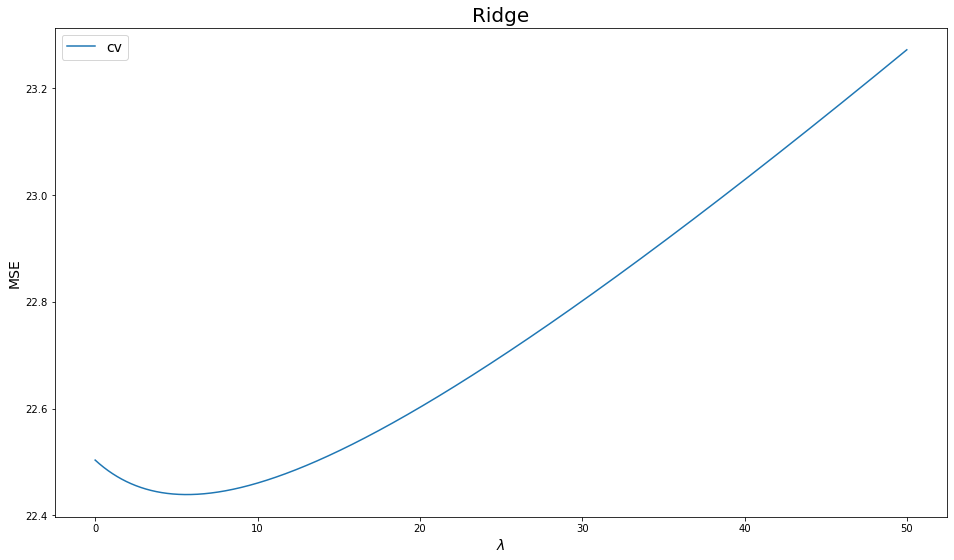

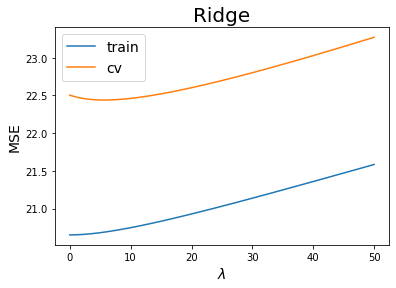

In [49]:
lambdas= np.arange(0, 50, step=0.01)
ridge_train, ridge_test = model_eval(x, lambdas)
error_plot(lambdas, ridge_train, ridge_test, "Ridge")

In [50]:
model = Ridge(alpha=10, max_iter=10000)
model.fit(x, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)

In [51]:
mse

27.91958217504258

In [52]:
r2 = model.score(x_test, y_test)

In [53]:
r2

0.6660146140165379